# Homework 4: Data Visualization
- **Name**:  Brian Le
- **UB Username**: btle
- **UB Person Number**:  50300703

--- 
## Part 1 - Generate Plots According to Specifications

### Problem 1 - Scatter Plot with a Line

In [2]:
import pandas as pd
import numpy as np
import csv
import matplotlib.pyplot as plt

[91    50.095311
Name: x, dtype: float64, 99    99.863385
Name: x, dtype: float64]
[91    330.376289
Name:  y , dtype: float64, 99    335.755833
Name:  y , dtype: float64]


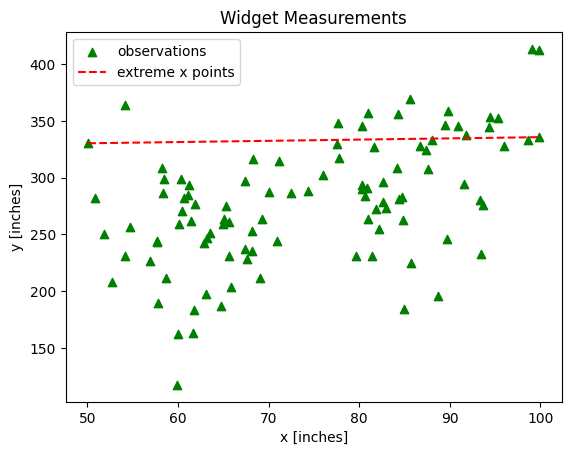

In [3]:
file = pd.read_csv("/Users/brianle/Desktop/IE459/scatter_data.csv")
df = pd.DataFrame(file)


x = df['x']
y = df[' y ']
minimum = df[df['x'] == df['x'].min()]
maximum = df[df['x'] == df['x'].max()]
xval = [minimum['x'],maximum['x']]
yval = [minimum[' y '],maximum[' y ']]
print(xval)
print(yval)



plt.scatter(x,y, marker = '^', color = 'green')
plt.plot(xval, yval, color = 'red', linestyle = 'dashed')
plt.ylabel('y [inches]')
plt.xlabel('x [inches]')
plt.title('Widget Measurements')
plt.legend(['observations', 'extreme x points'])
plt.show()

### Problem 2 - Histogram

studentID
F     3
D    14
C    21
B    28
A     5
Name: count, dtype: int64


/var/folders/n0/qf1w5yhn5jv4p57ppsxykwd80000gn/T/ipykernel_5965/3525780842.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  A['studentID'] = 'A'
/var/folders/n0/qf1w5yhn5jv4p57ppsxykwd80000gn/T/ipykernel_5965/3525780842.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  B['studentID'] = 'B'
/var/folders/n0/qf1w5yhn5jv4p57ppsxykwd80000gn/T/ipykernel_5965/3525780842.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] 

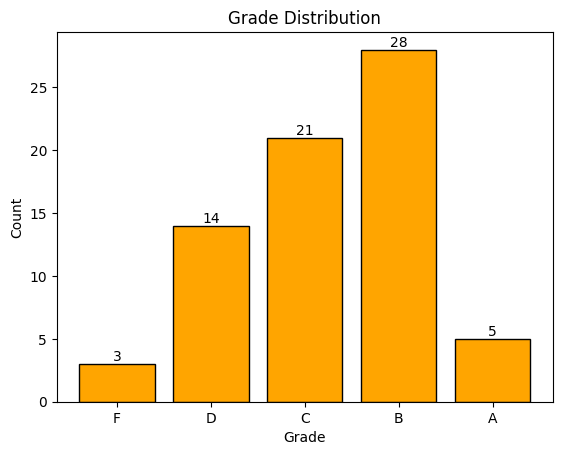

In [4]:
file2 = pd.read_csv("/Users/brianle/Desktop/IE459/student_grades.csv")
df2 = pd.DataFrame(file2)
df2

A = df2[(df2[' avgScore '] >= 90) & (df2[' avgScore '] < 100)]
B = df2[(df2[' avgScore '] >= 80) & (df2[' avgScore '] < 90)]
C = df2[(df2[' avgScore '] >= 70) & (df2[' avgScore '] < 80)]
D = df2[(df2[' avgScore '] >= 60) & (df2[' avgScore '] < 70)]
F = df2[(df2[' avgScore '] < 60)]

A['studentID'] = 'A'
B['studentID'] = 'B'
C['studentID'] = 'C'
D['studentID'] = 'D'
F['studentID'] = 'F'

grades = pd.concat([A,B,C,D,F])
histdata = grades['studentID'].value_counts()
histdata_real = histdata.sort_index(ascending=False)
print(histdata_real)

plot = plt.bar(histdata_real.index, histdata_real, edgecolor = 'black', color = 'orange')
plt.xlabel('Grade')
plt.ylabel('Count')
plt.title('Grade Distribution')

for bar in plot:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height, str(int(height)), ha='center', va='bottom')

plt.show()

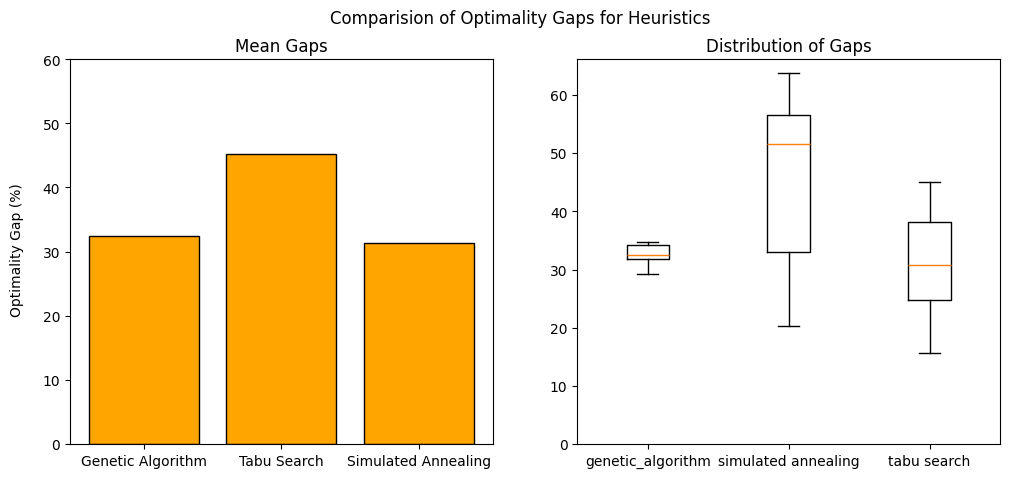

### Problem 3 - Barplot and Boxplot in the Same Figure

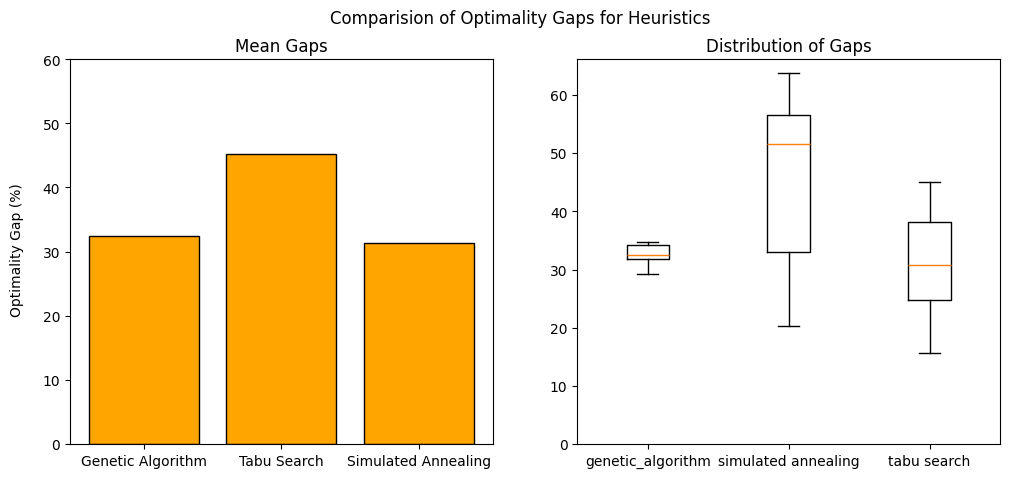

In [6]:
file3 = pd.read_csv("/Users/brianle/Desktop/IE459/solution_data.csv")
df3 = pd.DataFrame(file3)

optimal = df3[(df3['SolnMethod'] == 'optimal')]
genetic_algorithm = df3[(df3['SolnMethod'] == 'genetic algorithm')]
tabu_search = df3[(df3['SolnMethod'] == 'tabu search')]
simulated_annealing = df3[(df3['SolnMethod'] == 'simulated annealing')]

optimal.reset_index(inplace=True)
genetic_algorithm.reset_index(inplace=True)
tabu_search.reset_index(inplace=True)
simulated_annealing.reset_index(inplace=True)

gap_genetic = ((optimal['Value'] - genetic_algorithm['Value']) / (optimal['Value']) * 100)
gap_tabu = ((optimal['Value'] - tabu_search['Value']) / (optimal['Value']) * 100)
gap_simulated = ((optimal['Value'] - simulated_annealing['Value']) / (optimal['Value']) * 100)

avg_genetic = gap_genetic.mean()
avg_tabu = gap_tabu.mean()
avg_simulated = gap_simulated.mean()

bar_x = ['Genetic Algorithm','Tabu Search', 'Simulated Annealing']
bar_y = [avg_genetic,avg_simulated,avg_tabu]

fig, (ax1,ax2) = plt.subplots(1,2, figsize=(12,5))

ax1.set_ylim(0,60)
ax1.set_title("Mean Gaps")
ax1.bar(bar_x,bar_y, edgecolor = 'black', color = 'orange')
ax1.set_yticks(range(0,61,10))

combined = pd.concat([gap_genetic,gap_simulated,gap_tabu], axis = 1)
combined.columns = ['genetic_algorithm', 'simulated annealing', 'tabu_search']
ax2.boxplot(combined, labels = ['genetic_algorithm', 'simulated annealing', 'tabu search'])
ax2.set_title("Distribution of Gaps")
ax2.set_yticks(range(0,61,10))

fig.text(0.075,0.5, 'Optimality Gap (%)', va = 'center', rotation = 'vertical')
fig.suptitle('Comparision of Optimality Gaps for Heuristics')
plt.show()

--- 
## Part 2 - Explore New Plot Types

The plot that I will be creating will use information on retail prices for fruits and vegetables. The purpose is to see what kind of fruits/vegetables have amongst the highest retail prices and which are the lowest. There are also multiple categories for these items such as fresh, frozen, canned, etc. Since I am looking to analyze prices across many different items that are each separated by various categories (listed as 'form' in the dataset), I opted for a heatmap. The visual nature of a heatmap and the sheer number of the items makes it easy for a user to quickly find the highest contributors towards the price compared to other graph formats that could make it too clustered.

- **URL of Example Code**: https://matplotlib.org/stable/gallery/images_contours_and_fields/image_annotated_heatmap.html#sphx-glr-gallery-images-contours-and-fields-image-annotated-heatmap-py
- **URL of Sample Data**:  https://www.kaggle.com/datasets/anshikakashyap12/fruits-and-vegetables-prices-in-usa/

([<matplotlib.axis.YTick at 0x135726450>,
 [Text(0, 0, 'Acorn squash'),
  Text(0, 1, 'Apples'),
  Text(0, 2, 'Apples, applesauce'),
  Text(0, 3, 'Apples, frozen concentrate'),
  Text(0, 4, 'Apples, ready-to-drink'),
  Text(0, 5, 'Apricots'),
  Text(0, 6, 'Apricots, packed in juice'),
  Text(0, 7, 'Apricots, packed in syrup or water'),
  Text(0, 8, 'Artichoke'),
  Text(0, 9, 'Asparagus'),
  Text(0, 10, 'Avocados'),
  Text(0, 11, 'Bananas'),
  Text(0, 12, 'Beets'),
  Text(0, 13, 'Berries, mixed'),
  Text(0, 14, 'Black beans'),
  Text(0, 15, 'Blackberries'),
  Text(0, 16, 'Blackeye peas'),
  Text(0, 17, 'Blueberries'),
  Text(0, 18, 'Broccoli'),
  Text(0, 19, 'Broccoli florets'),
  Text(0, 20, 'Broccoli heads'),
  Text(0, 21, 'Brussels sprouts'),
  Text(0, 22, 'Butternut squash'),
  Text(0, 23, 'Cabbage, green'),
  Text(0, 24, 'Cabbage, red'),
  Text(0, 25, 'Cabbage, sauerkraut'),
  Text(0, 26, 'Cantaloupe'),
  Text(0, 27, 'Carrots'),
  Text(0, 28, 'Carrots, baby'),
  Text(0, 29, 'Carrots

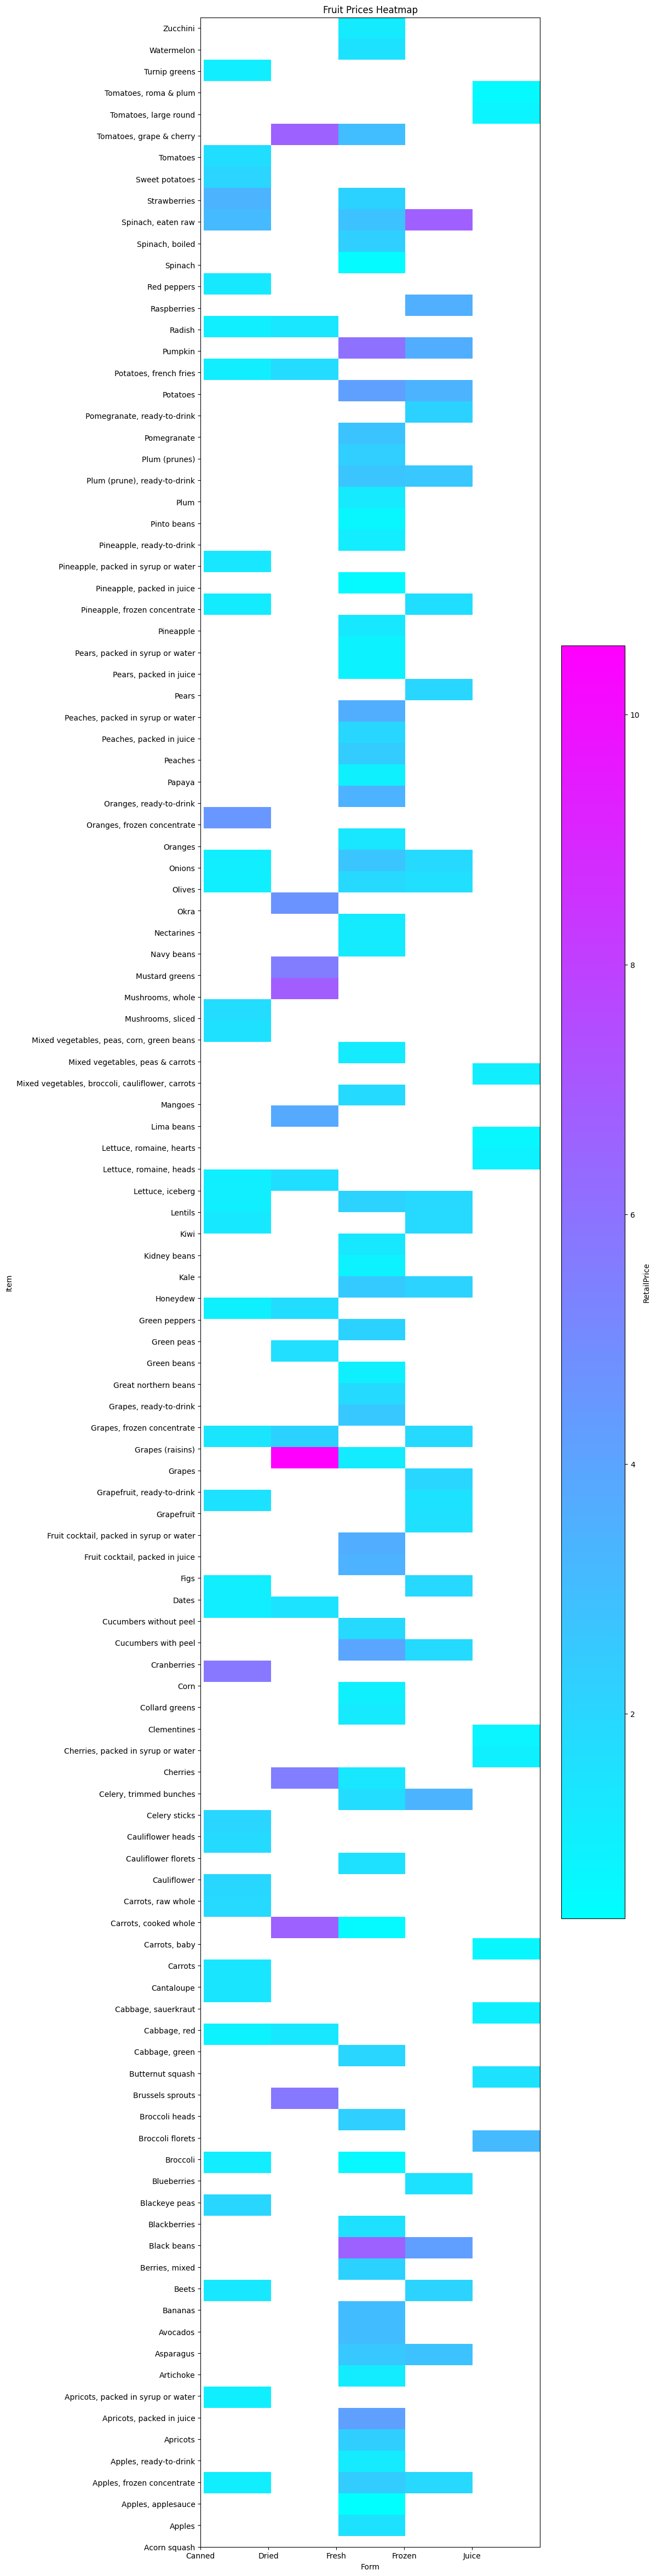

In [14]:
#Importing the dataset
file4 = pd.read_csv('/Users/brianle/Desktop/IE459/Prices.csv')
df4 = pd.DataFrame(file4)

#Pivot table creation that shapes in a usable format
heatmap = df4.pivot_table(index='Item', columns='Form', values='RetailPrice')

#Modify size of the heat map to fit the items
plt.figure(figsize=(10,60))

#imshow is the function for creating a heatmap
#cmap is the color map
#aspect is the aspect ratio
#extent is the position of the heatmap in (x1,x2,y1,y2) format
plt.imshow(heatmap.values, cmap='cool', aspect='auto', extent=(0.05, len(heatmap.columns) - 0.5, 0.5, len(heatmap.index) - 0.5))

#Labeling
plt.colorbar(label='RetailPrice')
plt.title('Fruit Prices Heatmap')
plt.xlabel('Form')
plt.ylabel('Item')
plt.xticks(range(len(heatmap.columns)), heatmap.columns)
plt.yticks(range(len(heatmap.index)), heatmap.index)



[Now, finish up your plot with a Markdown explanation of the key elements of the above code.  It is particularly useful to provide examples of how someone else might want to customize your plot.  For example, perhaps they might want to change colors, font sizes, scales, etc.]

First I imported the data on fruits and vegetables. 

After I created a pivot table. A pivot table organizes the data in a usable format for a heatmap. The index and values are what you would essentially want to model in a xy relationship and the columns are the groups/categories of said indices. 

Afterwards, I modified the size of the heatmap using plt.figure so that it could fit the massive number of items. Use experimentation to see the suitable size where the first place in the formula is the width and the second place is the height (a,b)

Plt.imshow is the function that displays the heatmap using the created pivot table. Cmap stands for color map and you can look up online various color schemes for the heatmap. Aspect is the aspect ratio which I set to automatically do it for the image. Extent is basically the location of the bars as well in (x1,x2,y1,y2) format. I set the x2/y2 as 0.5 - Columns(form)/Indices(Fruits and Vegetables) to get closer to an ideal visualization. Again, experiment with this part.

Finally, I labeled everything for the graph.